# Two-way Sparse Logistic Singular Value Decomposition: User Guide

We developed a Python package for Two-way Sparse Logistic Singular Value Decomposition (SLSVD2) to analyze two-way binary matrix data. The algorithm combines the Majorization-Minimization and Coordinate Descent algorithms. 

## Setup

Before starting, ensure you have installed the `slsvd2` package and import the necessary libraries:

In [1]:
import slsvd2
import numpy as np
import matplotlib.pyplot as plt

print(slsvd2.__version__)

0.1.0


## Simulated Two-way Binary Matrix Data Generation

We generated binary matrix data by specifying the number of samples `n`, the number of features `d`, and the rank `rank`, with `random_seed` used for reproducibility.

In [2]:
from slsvd2.data2 import *

In [3]:
bin_mat, loadings, scores, diagonal=generate_data_2_way(n=200, d=100, rank=2, random_seed=123)

In [4]:
bin_mat.shape

(200, 100)

In [5]:
np.count_nonzero(loadings,axis=0)

array([20, 20])

In [6]:
np.count_nonzero(scores,axis=0)

array([20, 20])

In [7]:
loadings.T @ loadings

array([[1., 0.],
       [0., 1.]])

In [8]:
scores.T @ scores

array([[1., 0.],
       [0., 1.]])

In [9]:
diagonal

array([[100,   0],
       [  0,  50]])

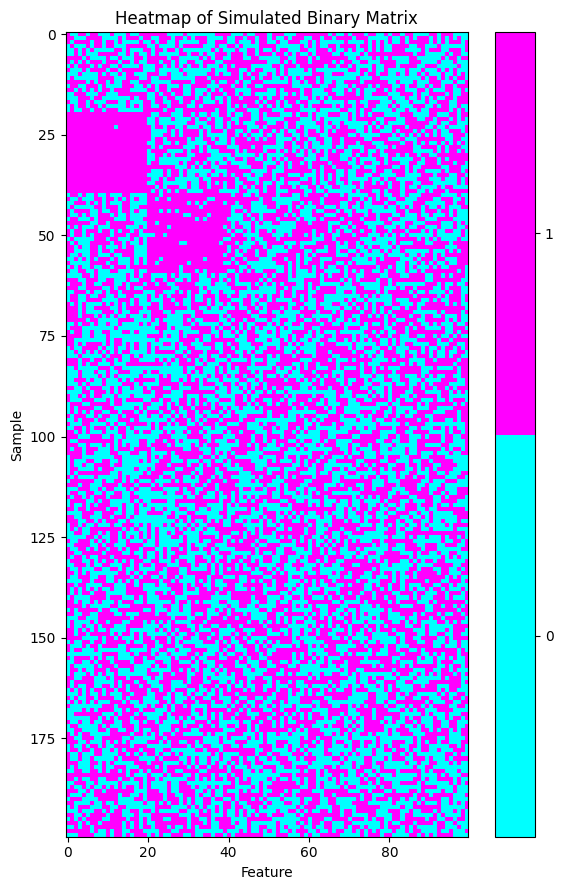

In [10]:
plt.figure(figsize=(6, 9))  # Adjust the width and height as needed

# Create a custom colormap using cyan and magenta
colors = ['cyan', 'magenta']
cmap = plt.matplotlib.colors.ListedColormap(colors, name='custom_cmap', N=2)

plt.imshow(bin_mat, cmap=cmap, interpolation='nearest')

cbar = plt.colorbar(ticks=[0.25, 0.75])
cbar.ax.set_yticklabels(['0', '1'])

plt.title('Heatmap of Simulated Binary Matrix')
plt.xlabel('Feature')
plt.ylabel('Sample')

# Use tight layout to reduce white space
plt.tight_layout()

#plt.savefig('heatmap.png', format='png', dpi=300)
# Show the plot
plt.show()


## Two-way Sparse Logistic SVD 

We implement the Two-way Sparse Logistic Singular Value Decomposition (SLSVD2) using Coordinate Descent and Majorization-Minimization algorithms. The parameter `dat` represents the binary matrix data, `lambdas` denotes the sequence of tuning parameters for scores, `etas` denotes the sequence of tuning parameters for loadings and `k` specifies the predetermined rank.

In [11]:
from slsvd2.slsvd2 import *

### Two-way Sparse Logistic SVD with $\lambda=0$

In [12]:
mu0, A0, B0,S0,zeros0, BICs0=sparse_logistic_svd_coord_2_way(dat=bin_mat, lambdas=np.array([0]),etas=np.array([0]),k=2) 

In [13]:
mu0

0.07933574417007386

In [14]:
A0.shape

(200, 2)

In [15]:
S0

array([[54.71211288,  0.        ],
       [ 0.        , 50.67857296]])

### Two-way Sparse Logistic SVD with $\lambda\neq 0$

In [16]:
thelam=np.logspace(-2, 0.7, num=5)

In [17]:
theeta=np.logspace(-2, 0.7, num=5)

In [18]:
mu, A, B,S, zeros, BICs=sparse_logistic_svd_coord_2_way(dat=bin_mat, lambdas=thelam, etas=theeta, k=2) 

In [19]:
mu

0.07933574417007386

In [20]:
A.shape

(200, 2)

In [21]:
A.T @ A

array([[1.        , 0.02601576],
       [0.02601576, 1.        ]])

In [22]:
B.T @ B

array([[1.        , 0.03334437],
       [0.03334437, 1.        ]])

In [23]:
np.count_nonzero(A,axis=0)

array([23, 23])

In [24]:
np.count_nonzero(B,axis=0)

array([21, 14])

In [25]:
S

array([[16.30303605,  0.        ],
       [ 0.        , 11.50328828]])

In [26]:
BICs

array([[29445.97634893, 29760.24508855],
       [29405.92212765, 29758.95932715],
       [29325.86613546, 29619.23657349],
       [28877.99756874, 29173.48882736],
       [27986.21755067, 28275.76767929],
       [29445.63827744, 29738.74341566],
       [29396.35016701, 29728.80074177],
       [29296.63609052, 29579.81415518],
       [28858.90920586, 29154.33354876],
       [27966.23301783, 28275.90632806],
       [29369.72044882, 29711.85661782],
       [29359.92593077, 29652.41963623],
       [29250.45674799, 29543.16081213],
       [28823.85129965, 29128.31759295],
       [27937.13965123, 28229.9016787 ],
       [29236.2880702 , 29517.58980199],
       [29246.39950368, 29468.55905391],
       [29107.46506407, 29380.25486936],
       [28666.30790403, 28898.01392712],
       [27720.66509572, 27948.58092169],
       [28959.6498346 , 29219.40848972],
       [28955.78255456, 29180.18890711],
       [28847.28838592, 29085.05130973],
       [28393.66602999, 28581.71767051],
       [27433.96

In [27]:
range(BICs.shape[0])

range(0, 25)

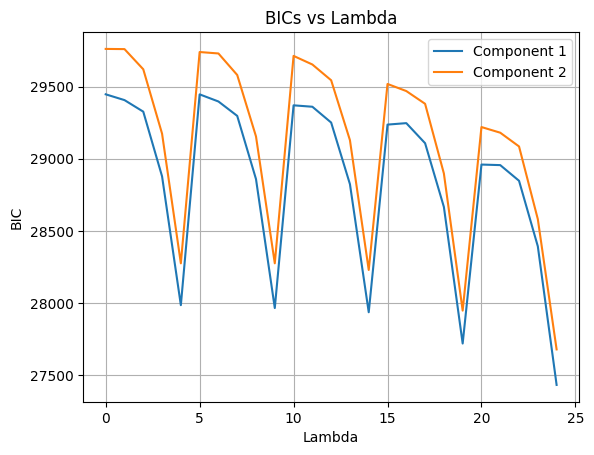

In [28]:
for i in range(BICs.shape[1]):
    plt.plot(range(BICs.shape[0]), BICs[:, i], label=f'Component {i+1}')

plt.xlabel('Lambda')
plt.ylabel('BIC')
plt.title('BICs vs Lambda')
#plt.xscale('log')  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

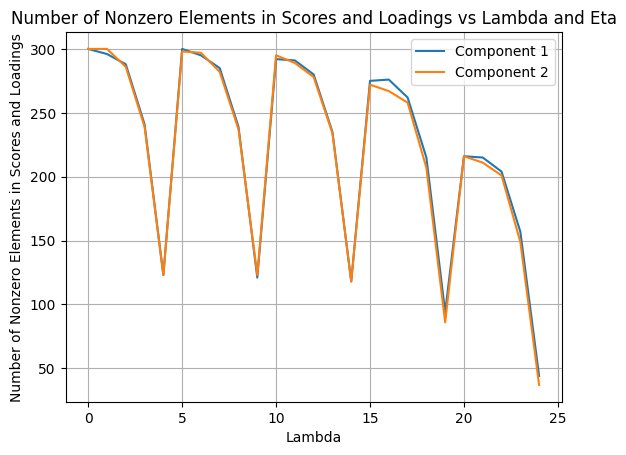

In [29]:
for i in range(zeros.shape[1]):
    plt.plot(range(zeros.shape[0]), zeros[:, i],label=f'Component {i+1}')

plt.xlabel('Lambda')
plt.ylabel('Number of Nonzero Elements in Scores and Loadings')
plt.title('Number of Nonzero Elements in Scores and Loadings vs Lambda and Eta')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
res= A @ S @ B.T

In [31]:
res.shape

(200, 100)

In [32]:
np.max(res),np.min(res)

(1.0700858754946383, -1.2249930692398827)

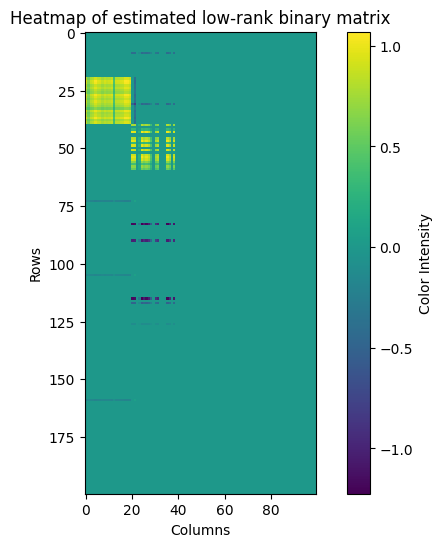

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(res, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Color Intensity')
plt.title('Heatmap of estimated low-rank binary matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [34]:
truth= scores @ diagonal @ loadings.T

In [35]:
truth.shape

(200, 100)

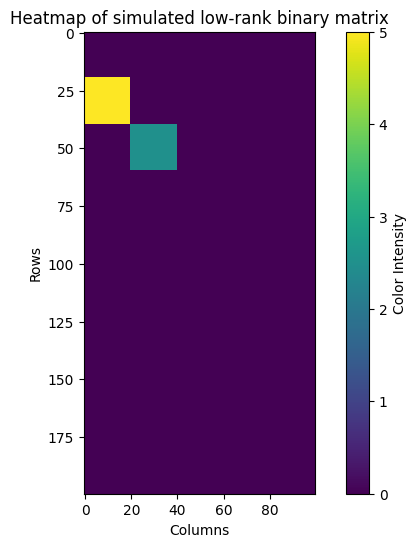

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(truth, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Color Intensity')
plt.title('Heatmap of simulated low-rank binary matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


## Numerical Comparisons between SLSVD2 with and without regularization

We compare the estimations of the loading matrix across three different dimension reduction methods. The metrics we use include Principal Angle, True Positive Rate (TPR), False Positive Rate (FPR), and Mean Square Error (MSE). It's easy to see that regularization on scores and loadings are necessary!

In [37]:
from slsvd2.metrics import *

### Comparison of True Positive Rate (TPR) and False Positive Rate (FPR)

In [38]:
true_positive_rate(B, loadings), false_positive_rate(B, loadings)

(0.85, 0.00625)

In [39]:
true_positive_rate(B0, loadings), false_positive_rate(B0, loadings)

(1.0, 1.0)

In [40]:
true_positive_rate(A, scores), false_positive_rate(A, scores)

(0.9, 0.027777777777777776)

In [41]:
true_positive_rate(A0, scores), false_positive_rate(A0, scores)

(1.0, 1.0)

### Comparison of Principle Angle

In [42]:
principle_angle(B, loadings),principle_angle(B0, loadings)

(38.65594131513399, 41.4523116035266)

In [43]:
principle_angle(A, scores),principle_angle(A0, scores)

(47.00416867144497, 53.33346059263594)

### Comparison of Mean Square Error (MSE)

In [44]:
mse(B,loadings),mse(B0,loadings)

(0.8437972644834811, 1.4856016476861293)

In [45]:
mse(A,scores),mse(A0,scores)

(1.1032845717410282, 2.085920450127711)

## Visualization

We visualize the true loadings and estimated loadings from SLSVD2 in one figure, and the true scores and estimated scores from SLSVD2 in one figure. It's easy to see that SLSVD2 does a good job in estimated the sparse scores and sparse loadings from two-way binary matrix data.

### Visualization of True Loadings and Estimated Loadings

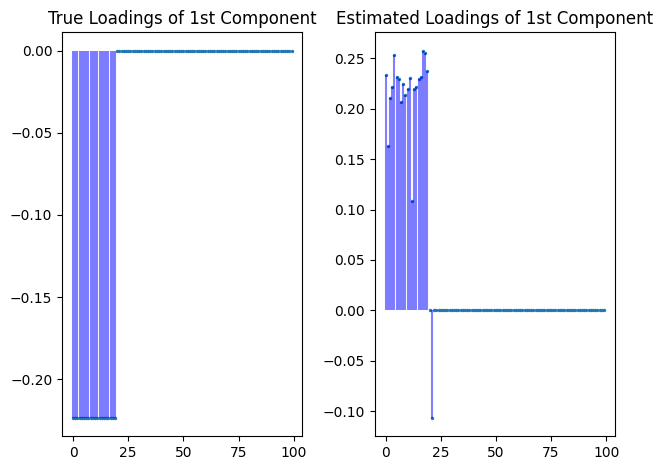

In [46]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], s=2)
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Loadings of 1st Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 0])), B[:, 0], s=2)
for i, val in enumerate(B[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Loadings of 1st Component')

plt.tight_layout()
plt.show()

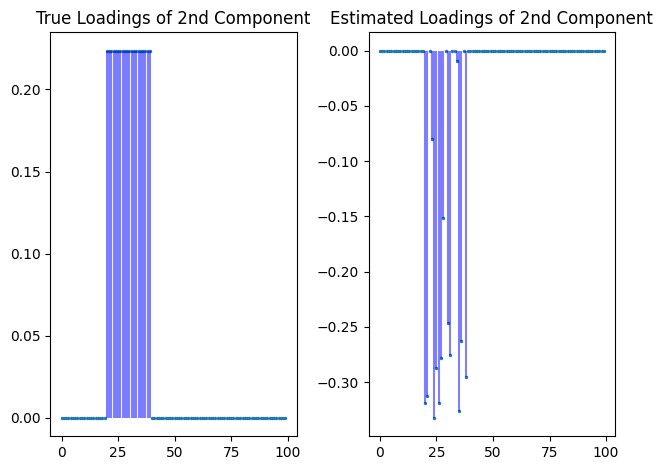

In [47]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 1])), loadings[:, 1], s=2)
for i, val in enumerate(loadings[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Loadings of 2nd Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), B[:, 1], s=2)
for i, val in enumerate(B[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Loadings of 2nd Component')

plt.tight_layout()
plt.show()

### Visualization of True Scores and Estimated Scores

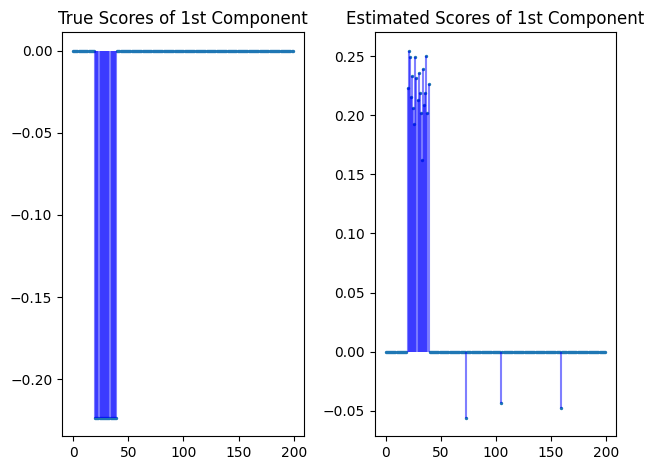

In [48]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(scores[:, 0])), scores[:, 0], s=2)
for i, val in enumerate(scores[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Scores of 1st Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(scores[:, 0])), A[:, 0], s=2)
for i, val in enumerate(A[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Scores of 1st Component')

plt.tight_layout()
plt.show()

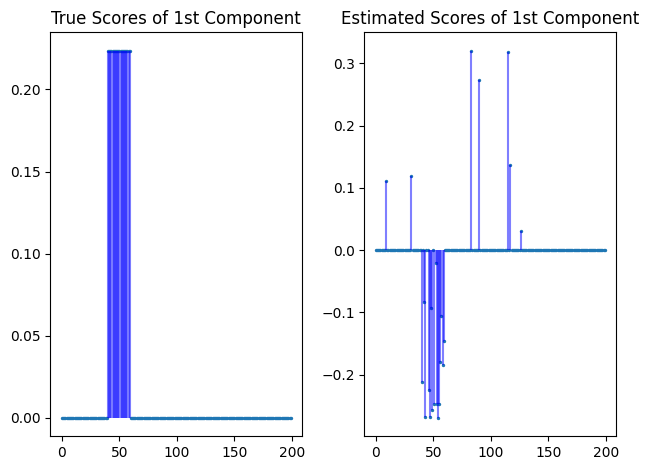

In [49]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(scores[:, 1])), scores[:, 1], s=2)
for i, val in enumerate(scores[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Scores of 1st Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(scores[:, 1])), A[:, 1], s=2)
for i, val in enumerate(A[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Scores of 1st Component')

plt.tight_layout()
plt.show()

## Reference
- Lee, S., & Huang, J. Z. (2014). A biclustering algorithm for binary matrices based on penalized Bernoulli likelihood. Statistics and Computing, 24, 429-441.